### Importando as bibliotecas e pacotes

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Carregando o dataset

In [2]:
path = "../data/dados_consumo_agua.csv"

df_dados_agua = pd.read_csv(path, sep = ",")
df_dados_agua.head()

,ano,mes,dia_semana,dia_mes,hora,quantidade_pessoas,consumo_agua_m3,regiao,padrao_consumo
0,2020,1,quarta,1,0,3,0.13,Sul,Normal
1,2020,1,quarta,1,1,3,0.21,Sul,Normal
2,2020,1,quarta,1,2,3,0.26,Sul,Normal
3,2020,1,quarta,1,3,3,0.15,Sul,Normal
4,2020,1,quarta,1,4,3,0.62,Sul,Alto


### Estatísticas descritivas dos dados

In [3]:
df_dados_agua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ano                 35040 non-null  int64  
 1   mes                 35040 non-null  int64  
 2   dia_semana          35040 non-null  object 
 3   dia_mes             35040 non-null  int64  
 4   hora                35040 non-null  int64  
 5   quantidade_pessoas  35040 non-null  int64  
 6   consumo_agua_m3     35040 non-null  float64
 7   regiao              35040 non-null  object 
 8   padrao_consumo      35040 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.4+ MB


In [4]:
df_dados_agua['consumo_agua_m3'].describe()

count    35040.000000
mean         0.920666
std          0.818677
min          0.030000
25%          0.240000
50%          0.740000
75%          1.280000
max          4.110000
Name: consumo_agua_m3, dtype: float64

### Análise univariada

##### Boxplot

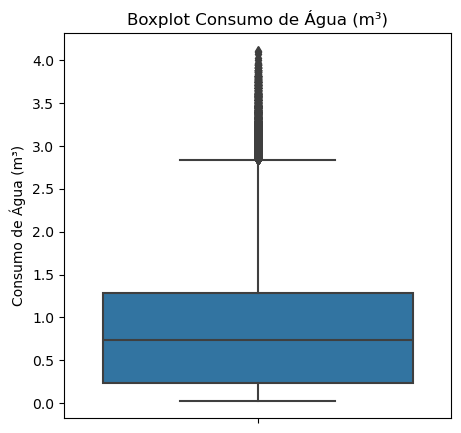

In [5]:
figure = plt.figure(figsize=(5, 5))
sns.boxplot(y=df_dados_agua['consumo_agua_m3'])
plt.title('Boxplot Consumo de Água (m³)')
plt.ylabel('Consumo de Água (m³)')
plt.show()

##### Histograma

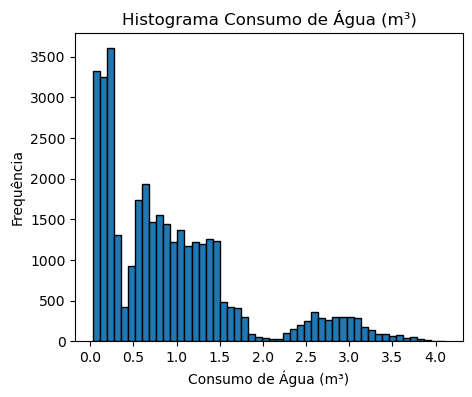

In [6]:
figure = plt.figure(figsize=(5, 4))
plt.hist(df_dados_agua['consumo_agua_m3'], bins=50, edgecolor='black')
plt.title('Histograma Consumo de Água (m³)')
plt.xlabel('Consumo de Água (m³)')
plt.ylabel('Frequência')
plt.show()

### Análise multivariada

##### Consumo de água (média) por mês

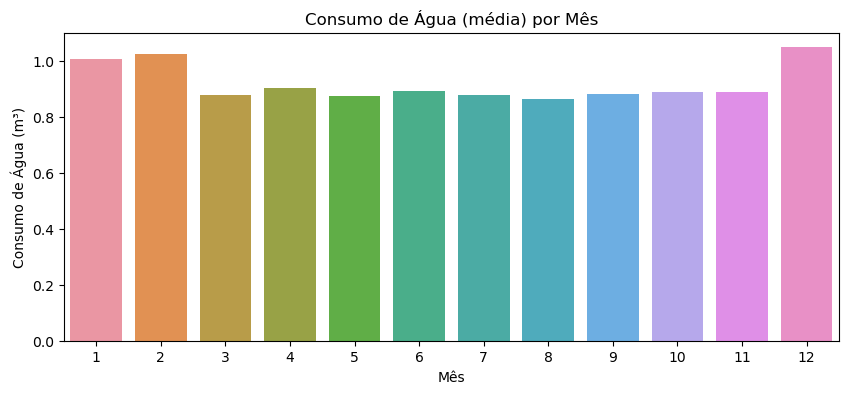

In [7]:
dados_consumo_mes = df_dados_agua.groupby('mes')['consumo_agua_m3'].aggregate('mean').reset_index()

figure = plt.figure(figsize=(10, 4))
sns.barplot(x='mes', y='consumo_agua_m3', data=dados_consumo_mes)
plt.title('Consumo de Água (média) por Mês')
plt.xlabel('Mês')
plt.ylabel('Consumo de Água (m³)')
plt.show()

##### Consumo de água (média) por dia da semana

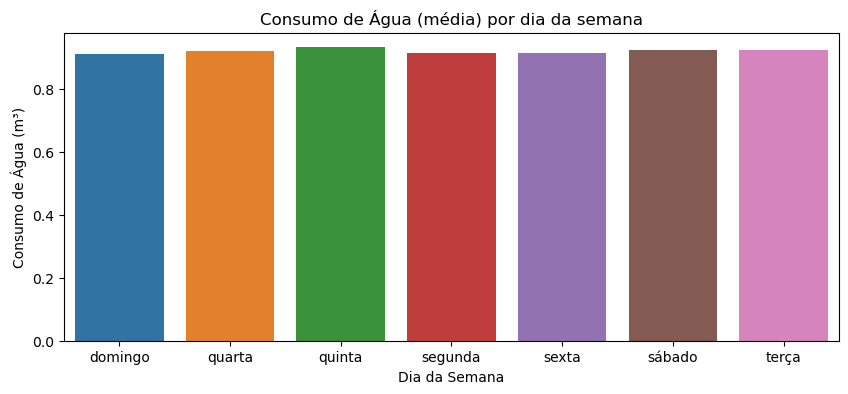

In [8]:
dados_consumo_dia = df_dados_agua.groupby('dia_semana')['consumo_agua_m3'].aggregate('mean').reset_index()

figure = plt.figure(figsize=(10, 4))
sns.barplot(x='dia_semana', y='consumo_agua_m3', data=dados_consumo_dia)
plt.title('Consumo de Água (média) por dia da semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Consumo de Água (m³)')
plt.show()

##### Consumo de água (média) por hora

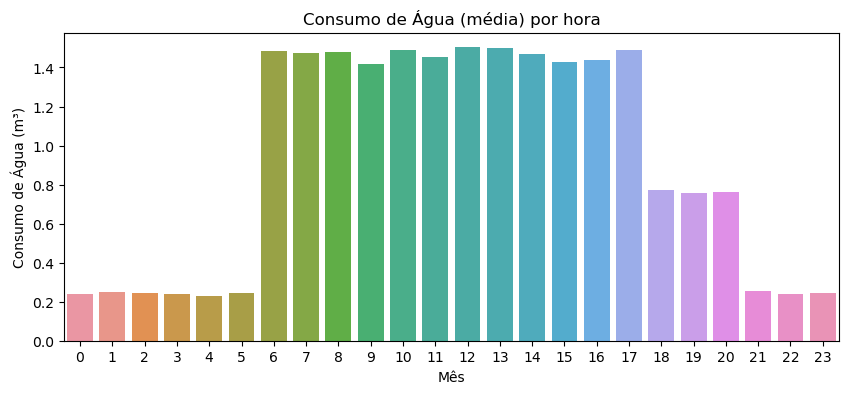

In [10]:
dados_consumo_hora = df_dados_agua.groupby('hora')['consumo_agua_m3'].aggregate('mean').reset_index()

figure = plt.figure(figsize=(10, 4))
sns.barplot(x='hora', y='consumo_agua_m3', data=dados_consumo_hora)
plt.title('Consumo de Água (média) por hora')
plt.xlabel('Mês')
plt.ylabel('Consumo de Água (m³)')
plt.show()